In [1]:
import numpy as np
import pandas as pd
import math
from numpy import *

In [2]:
x=pd.read_csv('x.csv')
t=pd.read_csv('t.csv')
x

,value
0,3.158482
1,3.196740
2,0.198259
3,1.132795
4,2.613827
...,...
95,2.171967
96,0.238764
97,2.632121
98,3.558541


In [3]:
s=0.1
M=7
beta=1
alpha=(10**-6)
m0=0
S0_inv=alpha*(np.eye(M, dtype = 'float'))

def sigmoid(x):
    return (1/(1 + math.exp(-x)))

def base_function(x,j,s):
    return(sigmoid( (x-4*j/M)/s) )

def predict(w0,w1,w2,w3,w4,w5,w6,x):
    return ( w0*base_function(x,0,s)+
             w1*base_function(x,1,s)+
             w2*base_function(x,2,s)+
             w3*base_function(x,3,s)+
             w4*base_function(x,4,s)+
             w5*base_function(x,5,s)+
             w6*base_function(x,6,s) )

In [4]:
test_case=[10,15,30,80]
design_matrix1=np.ones((10,M))
design_matrix2=np.ones((15,M))
design_matrix3=np.ones((30,M))
design_matrix4=np.ones((80,M))
t_array=t[0:10]
for i in range(10):
    for j in range(M):
        design_matrix1[i][j] = base_function(x.iloc[i],j,s)
        SN_inv1=alpha*np.eye(M, dtype = 'float')+beta*(design_matrix1.T).dot(design_matrix1)
        mN1=beta*np.linalg.inv(SN_inv1).dot(design_matrix1.T).dot(t_array)
        
t_array=t[0:15]
for i in range(15):
    for j in range(M):
        design_matrix2[i][j] = base_function(x.iloc[i],j,s)
        SN_inv2=alpha*np.eye(M, dtype = 'float')+beta*(design_matrix2.T).dot(design_matrix2)
        mN2=beta*np.linalg.inv(SN_inv2).dot(design_matrix2.T).dot(t_array)
        
t_array=t[0:30]    
for i in range(30):
    for j in range(M):
        design_matrix3[i][j] = base_function(x.iloc[i],j,s)
        SN_inv3=alpha*np.eye(M, dtype = 'float')+beta*(design_matrix3.T).dot(design_matrix3)
        mN3=beta*np.linalg.inv(SN_inv3).dot(design_matrix3.T).dot(t_array)
        
t_array=t[0:80]
for i in range(80):
    for j in range(M):
        design_matrix4[i][j] = base_function(x.iloc[i],j,s)
        SN_inv4=alpha*np.eye(M, dtype = 'float')+beta*(design_matrix4.T).dot(design_matrix4)
        mN4=beta*np.linalg.inv(SN_inv4).dot(design_matrix4.T).dot(t_array)
print("n=10")
print("mN=\n",mN1)
print("sN=\n",np.linalg.inv(SN_inv1))

print("n=15")
print("mN=\n",mN2)
print("sN=\n",np.linalg.inv(SN_inv2))

print("n=30")
print("mN=\n",mN3)
print("sN=\n",np.linalg.inv(SN_inv3))

print("n=80")
print("mN=\n",mN4)
print("sN=\n",np.linalg.inv(SN_inv4))

n=10
mN=
 [[ 2.49149812]
 [ 3.74531322]
 [-0.58778662]
 [ 1.45422855]
 [-3.38878003]
 [-2.33786254]
 [-4.02814808]]
sN=
 [[ 1.38615974e+00 -2.11099007e+00  1.28124651e+00 -5.97070690e-01
   5.06166812e-02 -1.12488906e-02  1.40111473e-03]
 [-2.11099007e+00  2.90625977e+01 -4.78815731e+01  2.24592934e+01
  -1.90408379e+00  4.23159976e-01 -5.27070515e-02]
 [ 1.28124651e+00 -4.78815731e+01  8.44335724e+01 -4.06060151e+01
   3.45270751e+00 -7.67763038e-01  9.56322980e-02]
 [-5.97070690e-01  2.24592934e+01 -4.06060151e+01  2.11542015e+01
  -3.06864515e+00  7.43667353e-01 -9.30439951e-02]
 [ 5.06166812e-02 -1.90408379e+00  3.45270751e+00 -3.06864515e+00
   2.92084253e+00 -1.64883432e+00  2.15411759e-01]
 [-1.12488906e-02  4.23159976e-01 -7.67763038e-01  7.43667353e-01
  -1.64883432e+00  1.89746203e+00 -7.24307849e-01]
 [ 1.40111473e-03 -5.27070515e-02  9.56322980e-02 -9.30439951e-02
   2.15411759e-01 -7.24307849e-01  1.64996427e+00]]
n=15
mN=
 [[ 2.9951038 ]
 [ 3.67520675]
 [-1.54195899]
 [ 1

In [5]:
import matplotlib.pyplot as plt
from tkinter import _flatten
w1_0,w1_1,w1_2,w1_3,w1_4,w1_5,w1_6 = np.random.multivariate_normal(mN1.flatten(), np.linalg.inv(SN_inv1), 5).T
w2_0,w2_1,w2_2,w2_3,w2_4,w2_5,w2_6 = np.random.multivariate_normal(mN2.flatten(), np.linalg.inv(SN_inv2), 5).T
w3_0,w3_1,w3_2,w3_3,w3_4,w3_5,w3_6 = np.random.multivariate_normal(mN3.flatten(), np.linalg.inv(SN_inv3), 5).T
w4_0,w4_1,w4_2,w4_3,w4_4,w4_5,w4_6 = np.random.multivariate_normal(mN4.flatten(), np.linalg.inv(SN_inv4), 5).T

mN4[0]

array([2.09775756])

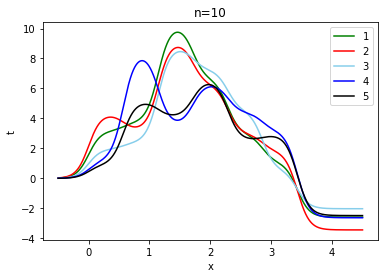

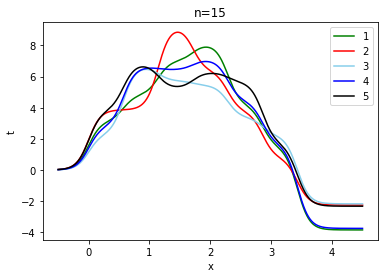

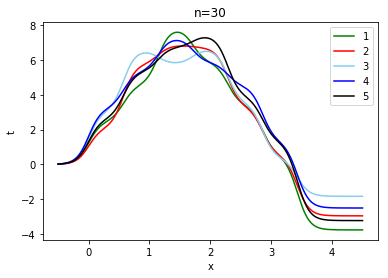

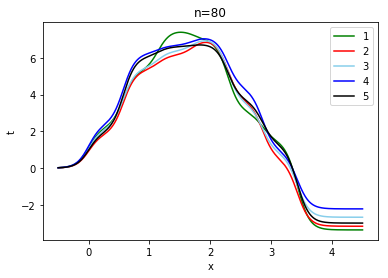

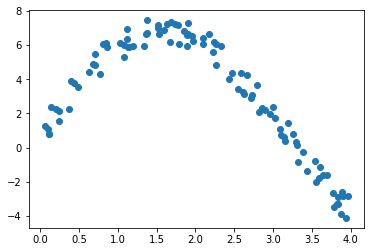

In [7]:
x_temp=np.linspace(-0.5,4.5,10000)
y1=[ predict(w1_0[0],w1_1[0],w1_2[0],w1_3[0],w1_4[0],w1_5[0],w1_6[0],i) for i in x_temp]  
y2=[ predict(w1_0[1],w1_1[1],w1_2[1],w1_3[1],w1_4[1],w1_5[1],w1_6[1],i) for i in x_temp] 
y3=[ predict(w1_0[2],w1_1[2],w1_2[2],w1_3[2],w1_4[2],w1_5[2],w1_6[2],i) for i in x_temp]  
y4=[ predict(w1_0[3],w1_1[3],w1_2[3],w1_3[3],w1_4[3],w1_5[3],w1_6[3],i) for i in x_temp]  

#y5=[ predict(mN4[0],mN4[1],mN4[2],mN4[3],mN4[4],mN4[5],mN4[6],i) for i in x_temp]  
y5=[ predict(w1_0[4],w1_1[4],w1_2[4],w1_3[4],w1_4[4],w1_5[4],w1_6[4],i) for i in x_temp]  
plt.plot(x_temp,y1,  color='green'  , label='1')
plt.plot(x_temp,y2,  color='red'    , label='2')
plt.plot(x_temp,y3,  color='skyblue', label='3')
plt.plot(x_temp,y4,  color='blue'   , label='4')
plt.plot(x_temp,y5,  color='black'   , label='5')
plt.xlabel('x')
plt.ylabel('t')
plt.title('n=10')
plt.legend()
plt.show()


x_temp=np.linspace(-0.5,4.5,10000)
y1=[ predict(w2_0[0],w2_1[0],w2_2[0],w2_3[0],w2_4[0],w2_5[0],w2_6[0],i) for i in x_temp]  
y2=[ predict(w2_0[1],w2_1[1],w2_2[1],w2_3[1],w2_4[1],w2_5[1],w2_6[1],i) for i in x_temp] 
y3=[ predict(w2_0[2],w2_1[2],w2_2[2],w2_3[2],w2_4[2],w2_5[2],w2_6[2],i) for i in x_temp]  
y4=[ predict(w2_0[3],w2_1[3],w2_2[3],w2_3[3],w2_4[3],w2_5[3],w2_6[3],i) for i in x_temp]  
y5=[ predict(w2_0[4],w2_1[4],w2_2[4],w2_3[4],w2_4[4],w2_5[4],w2_6[4],i) for i in x_temp]  
plt.plot(x_temp,y1,  color='green'  , label='1')
plt.plot(x_temp,y2,  color='red'    , label='2')
plt.plot(x_temp,y3,  color='skyblue', label='3')
plt.plot(x_temp,y4,  color='blue'   , label='4')
plt.plot(x_temp,y5,  color='black'   , label='5')
plt.xlabel('x')
plt.ylabel('t')
plt.title('n=15')
plt.legend()
plt.show()


x_temp=np.linspace(-0.5,4.5,10000)
y1=[ predict(w3_0[0],w3_1[0],w3_2[0],w3_3[0],w3_4[0],w3_5[0],w3_6[0],i) for i in x_temp]  
y2=[ predict(w3_0[1],w3_1[1],w3_2[1],w3_3[1],w3_4[1],w3_5[1],w3_6[1],i) for i in x_temp] 
y3=[ predict(w3_0[2],w3_1[2],w3_2[2],w3_3[2],w3_4[2],w3_5[2],w3_6[2],i) for i in x_temp]  
y4=[ predict(w3_0[3],w3_1[3],w3_2[3],w3_3[3],w3_4[3],w3_5[3],w3_6[3],i) for i in x_temp]  
y5=[ predict(w3_0[4],w3_1[4],w3_2[4],w3_3[4],w3_4[4],w3_5[4],w3_6[4],i) for i in x_temp]  
plt.plot(x_temp,y1,  color='green'  , label='1')
plt.plot(x_temp,y2,  color='red'    , label='2')
plt.plot(x_temp,y3,  color='skyblue', label='3')
plt.plot(x_temp,y4,  color='blue'   , label='4')
plt.plot(x_temp,y5,  color='black'   , label='5')
plt.xlabel('x')
plt.ylabel('t')
plt.title('n=30')
plt.legend()
plt.show()


x_temp=np.linspace(-0.5,4.5,10000)
y1=[ predict(w4_0[0],w4_1[0],w4_2[0],w4_3[0],w4_4[0],w4_5[0],w4_6[0],i) for i in x_temp]  
y2=[ predict(w4_0[1],w4_1[1],w4_2[1],w4_3[1],w4_4[1],w4_5[1],w4_6[1],i) for i in x_temp] 
y3=[ predict(w4_0[2],w4_1[2],w4_2[2],w4_3[2],w4_4[2],w4_5[2],w4_6[2],i) for i in x_temp]  
y4=[ predict(w4_0[3],w4_1[3],w4_2[3],w4_3[3],w4_4[3],w4_5[3],w4_6[3],i) for i in x_temp]  
y5=[ predict(w4_0[4],w4_1[4],w4_2[4],w4_3[4],w4_4[4],w4_5[4],w4_6[4],i) for i in x_temp]  
plt.plot(x_temp,y1,  color='green'  , label='1')
plt.plot(x_temp,y2,  color='red'    , label='2')
plt.plot(x_temp,y3,  color='skyblue', label='3')
plt.plot(x_temp,y4,  color='blue'   , label='4')
plt.plot(x_temp,y5,  color='black'   , label='5')
plt.xlabel('x')
plt.ylabel('t')
plt.title('n=80')
plt.legend()
plt.show()

plt.scatter(x,t)  # scatter绘制散点图
 
plt.draw()  # 显示绘图


In [8]:
def cal_predict_min(x,mN):
    min=0
    for i in range(7):
        min=min+mN[i]*base_function(x,i,s)
    return min
def cal_predict_var(x,SN):
    var=1/beta
    base=np.ones((M,1))
    for i in range(7):
        base[i]=base_function(x,i,s)
    var=var+base.T.dot(SN).dot(base)
    return var.flatten()

Text(0.5,1,'n=80')

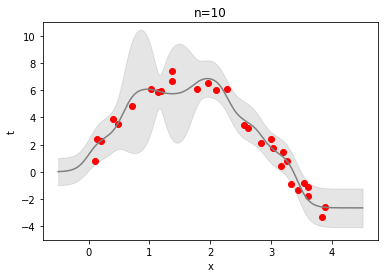

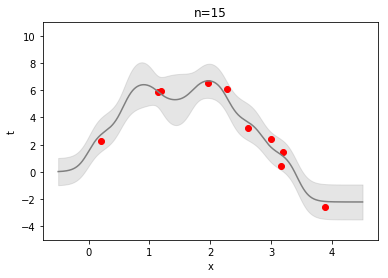

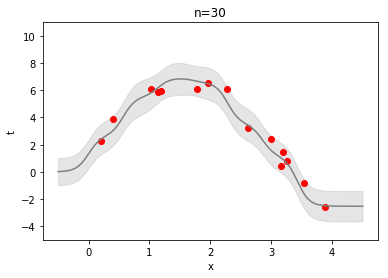

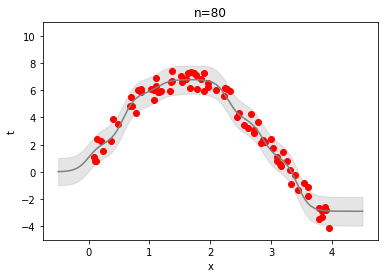

In [12]:
plt.figure()
x_temp=np.linspace(-0.5,4.5,10000)
y_temp=[ predict(mN1[0] ,mN1[1] ,mN1[2] , mN1[3],mN1[4] ,mN1[5] ,mN1[6] ,i)         for i in x_temp] 
y_temp = np.concatenate(y_temp).ravel().tolist()
var=[ cal_predict_var(i,np.linalg.inv(SN_inv1)) for i in x_temp] 
sigma=1*np.sqrt(var)
sigma=sigma.flatten()

plt.plot(x[:30],t[:30],'or')
plt.plot(x_temp,y_temp,'-',color='gray')
plt.fill_between(x_temp,y_temp-sigma,y_temp+sigma,color='gray',alpha=0.2)
plt.xlabel('x')
plt.ylabel('t')
plt.title('n=10')
plt.ylim(-5,11)


plt.figure()
x_temp=np.linspace(-0.5,4.5,10000)
y_temp=[ predict(mN2[0] ,mN2[1] ,mN2[2] , mN2[3],mN2[4] ,mN2[5] ,mN2[6] ,i)         for i in x_temp] 
y_temp = np.concatenate(y_temp).ravel().tolist()
var=[ cal_predict_var(i,np.linalg.inv(SN_inv2)) for i in x_temp] 
sigma=1*np.sqrt(var)
sigma=sigma.flatten()
plt.plot(x[:10],t[:10],'or')
plt.plot(x_temp,y_temp,'-',color='gray')
plt.fill_between(x_temp,y_temp-sigma,y_temp+sigma,color='gray',alpha=0.2)
plt.xlabel('x')
plt.ylabel('t')
plt.title('n=15')
plt.ylim(-5,11)



plt.figure()
x_temp=np.linspace(-0.5,4.5,10000)
y_temp=[ predict(mN3[0] ,mN3[1] ,mN3[2] , mN3[3],mN3[4] ,mN3[5] ,mN3[6] ,i)         for i in x_temp] 
y_temp = np.concatenate(y_temp).ravel().tolist()
var=[ cal_predict_var(i,np.linalg.inv(SN_inv3)) for i in x_temp] 
sigma=1*np.sqrt(var)
sigma=sigma.flatten()
plt.plot(x[:15],t[:15],'or')
plt.plot(x_temp,y_temp,'-',color='gray')
plt.fill_between(x_temp,y_temp-sigma,y_temp+sigma,color='gray',alpha=0.2)
plt.ylim(-5,11)
plt.xlabel('x')
plt.ylabel('t')
plt.title('n=30')



x_temp=np.linspace(-0.5,4.5,10000)
y_temp=[ predict(mN4[0] ,mN4[1] ,mN4[2] , mN4[3],mN4[4] ,mN4[5] ,mN4[6] ,i)         for i in x_temp] 
y_temp = np.concatenate(y_temp).ravel().tolist()
var=[ cal_predict_var(i,np.linalg.inv(SN_inv4)) for i in x_temp] 
sigma=1*np.sqrt(var)
sigma=sigma.flatten()
plt.figure()
plt.plot(x[:80],t[:80],'or')
plt.plot(x_temp,y_temp,'-',color='gray')
plt.fill_between(x_temp,y_temp-sigma,y_temp+sigma,color='gray',alpha=0.2)
plt.ylim(-5,11)
plt.xlabel('x')
plt.ylabel('t')
plt.title('n=80')
